In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 2 #

In [2]:
def proj(orth, w):
    return sum((np.dot(u, w) / np.dot(u, u)) * u for u in orth)

def rej(orth, w):
    return w - proj(orth, w)

proj([np.array([1, 0, 0]), np.array([0, 1, 0])], np.array([1, 1, 1]))
rej([np.array([1, 0, 0]), np.array([0, 1, 0])], np.array([1, 1, 1]))

array([0., 0., 1.])

In [3]:
def GS(Q, tol=1e-8):
    m, n = np.shape(Q)
    if m <= n:
        return Q

    I = np.eye(m)
    u = 0
    i = 0
    while np.linalg.norm(u) < tol:
        u = rej(Q.T, I[i])
        u = np.array([[ui] for ui in u])
        i += 1
    return GS(np.append(Q, u, axis=1))

Z = np.array([
    [9, -6],
    [12, -8],
    [0, 20]
])
np.shape(Z)

(3, 2)

In [4]:
def upper(U, b, tol=1e-8):
    n, m = U.shape
    if n != m or n != b.shape[0]:
        raise TypeError('Matrix and vector dimensions do not match')

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        if abs(U[i, i]) < tol:
            raise ValueError('Pivot < tolerance')
        x[i] = (b[i] - np.dot(U[i, i + 1:], x[i + 1:])) / U[i, i]
    return x

def least_squares(A, b):
    Q, R = np.linalg.qr(A)
    return upper(R, Q.T @ b)

In [5]:
A = np.array([
    [9, -6],
    [12, -8],
    [0, 20]
])
b = np.array([300, 600, 900])
A, b

(array([[ 9, -6],
        [12, -8],
        [ 0, 20]]),
 array([300, 600, 900]))

In [6]:
Qh, R = np.linalg.qr(A)
Qh, R

(array([[-0.6,  0. ],
        [-0.8,  0. ],
        [-0. , -1. ]]),
 array([[-15.,  10.],
        [  0., -20.]]))

In [7]:
x = upper(R, Qh.T @ b)
x

array([74., 45.])

In [8]:
Q = GS(Qh)
Qh, Q

(array([[-0.6,  0. ],
        [-0.8,  0. ],
        [-0. , -1. ]]),
 array([[-0.6 ,  0.  ,  0.64],
        [-0.8 ,  0.  , -0.48],
        [-0.  , -1.  ,  0.  ]]))

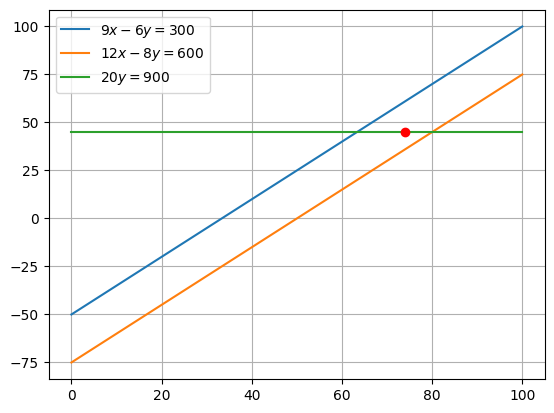

In [9]:
fig, ax = plt.subplots()

n = 1000
x_axis = np.linspace(0, 100, n)
y3 = np.full(n, 900 / 20)
y2 = (12 * x_axis - 600) / 8
y1 = (9 * x_axis - 300) / 6

ax.plot(x_axis, y1, label='$9x-6y=300$')
ax.plot(x_axis, y2, label='$12x-8y=600$')
ax.plot(x_axis, y3, label='$20y=900$')

ax.scatter(*x, zorder=5, c='r')

ax.grid('on')
ax.legend()
plt.show()

In [10]:
np.linalg.norm(A @ x - b)

np.float64(120.0)

# 3 #

In [11]:
m = 8
t = np.arange(m)
l = np.array([7.3, 7.0, 10.4, 10.1, 13.7, 15.3, 16.6, 18.7])

In [12]:
k0 = np.dot(t, l) / np.dot(t, t)
k0, np.linalg.norm(l - k0 * t)

(np.float64(2.999285714285714), np.float64(10.004495418132219))

In [13]:
T = np.array([[ti, 1] for ti in t])
k1, d1 = least_squares(T, l)

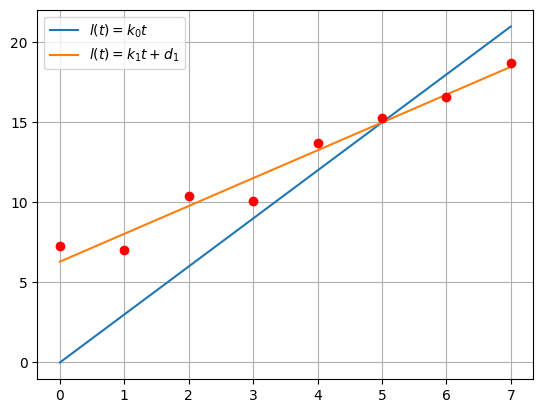

In [14]:
fig, ax = plt.subplots()

ax.plot(t, k0 * t, label='$l(t)=k_0t$')
ax.plot(t, k1 * t + d1, label='$l(t)=k_1t+d_1$')
ax.scatter(t, l, zorder=5, c='r')

ax.grid('on')
ax.legend()
plt.show()

# 4 #

In [15]:
X = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
Y = np.array([0.0, 0.20, 0.27, 0.30, 0.32, 0.33])

M = np.array([[Xi ** p for p in range(3, -1, -1)] for Xi in X])
M

array([[ 0.   ,  0.   ,  0.   ,  1.   ],
       [ 0.125,  0.25 ,  0.5  ,  1.   ],
       [ 1.   ,  1.   ,  1.   ,  1.   ],
       [ 3.375,  2.25 ,  1.5  ,  1.   ],
       [ 8.   ,  4.   ,  2.   ,  1.   ],
       [15.625,  6.25 ,  2.5  ,  1.   ]])

In [16]:
coeff = least_squares(M, Y)
a, b, c, d = coeff
coeff

array([ 0.05111111, -0.27380952,  0.49698413,  0.00333333])

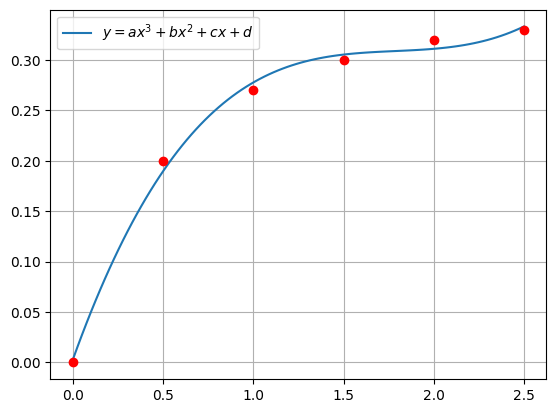

In [17]:
fig, ax = plt.subplots()

x_axis = np.linspace(0, 2.5, 100)
ax.plot(x_axis, a * x_axis ** 3 + b * x_axis ** 2 + c * x_axis + d, label='$y=ax^3+bx^2+cx+d$')
ax.scatter(X, Y, zorder=5, c='r')

ax.grid('on')
ax.legend()
plt.show()

# 5 #

In [25]:
n = 5
W1 = np.array([
    [160, 40, 0],
    [60, 320, 20],
    [560, 40, 300],
    [40, 60, 40],
    [440, 20, 0]
])
W2 = np.array([
    [130, 60, 10],
    [135, 178, 87],
    [433, 193, 274],
    [43, 47, 50],
    [311, 112, 37]
])

M = np.zeros((3 * n, 9))
M[0::3, [0, 1, 2]] = np.copy(W1)
M[1::3, [3, 4, 5]] = np.copy(W1)
M[2::3, [6, 7, 8]] = np.copy(W1)

b = np.copy(W2).flatten()
M, b

(array([[160.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 160.,  40.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 160.,  40.,   0.],
        [ 60., 320.,  20.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  60., 320.,  20.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  60., 320.,  20.],
        [560.,  40., 300.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 560.,  40., 300.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 560.,  40., 300.],
        [ 40.,  60.,  40.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  40.,  60.,  40.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  40.,  60.,  40.],
        [440.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0., 440.,  20.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0., 440.,  20.,   0.]]),
 array([130,  60,  10, 135, 178,  87, 

In [26]:
k = least_squares(M, b)
k

array([0.70046657, 0.28345178, 0.09548383, 0.23323897, 0.50543278,
       0.14119328, 0.06629445, 0.21111544, 0.7633229 ])

In [27]:
new_W = np.reshape(M @ k, (n, 3))
new_W, W2

(array([[123.41272311,  57.53554689,  19.05172999],
        [134.64224094, 178.55669331,  86.80106575],
        [432.24450088, 193.18911954, 274.56637958],
        [ 48.84512291,  45.3032568 ,  45.85162029],
        [313.87432826, 112.73380383,  33.39186791]]),
 array([[130,  60,  10],
        [135, 178,  87],
        [433, 193, 274],
        [ 43,  47,  50],
        [311, 112,  37]]))